# <font color='#d50283'>IT Academy - Ciència de Dades (online)</font>
## Tasca M4 T02: Visualització gràfica de dades
### Juan Javier Hidalgo Gómez

****Descripció****  
Visualització gràfica de múltiples variables.



### <font color='#d50283'>- Exercici 1</font>
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.

***Original GitHub***  
<font color='#FF0515'>*03 EXAMINING DATA*</font> [Link](<https://github.com/BIDDL3/Examining-Data/blob/main/03%20EXAMINING%20DATA.ipynb>)  
***Mi repositorio GitHub***   
<font color='#FF0515'>*03 EXAMINING DATA*</font> [Link](<https://github.com/Juanja67/Examining-Data/blob/main/03%20EXAMINING%20DATA.ipynb>)  
***Ejercicio realizado en:***   
    <font color='#FF0515'>*Tasca M4 T02(Exercici 1)*</font> [Link](<https://github.com/Juanja67/Data-Science/blob/main/Estructuras%20de%20Dataframe/Tasca%20M4%20T02_ex1.ipynb>)  


### <font color='#d50283'>- Exercici 2</font>
Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

<font color='#FF0515'>*PRE-PROCESSING-DATA/movies.dat*</font> [Link](<https://github.com/BIDDL3/PRE-PROCESSING-DATA/blob/main/movies.dat>)  
 
****[!]Important****

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

***Preparación del DataSet***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline( ver las gráficas en el propio notebook)

#Variables genéricas:
path=r'c:/Users/Nitropc/DS_Sprint_04/Fuente de Datos/movies.dat'
data = pd.read_csv(path,
                       sep='::',
                       encoding = 'ISO-8859-1',
                       index_col = 0,
                       names = ['Index','Película','Género','Año'],
                       engine = 'python',
                      )

data = pd.DataFrame(data)
data.head(5)

,Película,Género,Año
Index,,,
1,Toy Story (1995),Animation|Children's|Comedy,NaN
2,Jumanji (1995),Adventure|Children's|Fantasy,NaN
3,Grumpier Old Men (1995),Comedy|Romance,NaN
4,Waiting to Exhale (1995),Comedy|Drama,NaN
5,Father of the Bride Part II (1995),Comedy,NaN


***Configuramos las variables.***

In [2]:
df_pelis=data.copy(deep=True)
df_pelis.reindex(df_pelis['Año'])
# Añadimos el año desde la variable Película.
df_pelis['Año'] = df_pelis['Película'].str[-5:-1].astype(int)
# Eliminamos el año de la variable Película.
df_pelis['Película'] = df_pelis['Película'].str[:-6]

#Right  str[-1], left str[0]
df_pelis['Género'] = df_pelis['Género'].str.split("|").str[0]
# los ordeno según el ejecicio.
df_pelis = df_pelis.reindex(columns=['Película','Año','Género'])

df_pelis.head(10)

,Película,Año,Género
Index,,,
1,Toy Story,1995,Animation
2,Jumanji,1995,Adventure
3,Grumpier Old Men,1995,Comedy
4,Waiting to Exhale,1995,Comedy
5,Father of the Bride Part II,1995,Comedy
6,Heat,1995,Action
7,Sabrina,1995,Comedy
8,Tom and Huck,1995,Adventure
9,Sudden Death,1995,Action


In [3]:
df_pelis.shape # miramos dimensión de dataset.

(3883, 3)

In [4]:
df_pelis['Género'].unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'Fantasy',
       'Musical'], dtype=object)

In [5]:
df_pelis.ndim # dimensión del dataset.

2

In [6]:
# Comprobamos si tenemos duplicados
treg=len(df_pelis)
print(treg)
# eliminamos Filas duplicadas
df_pelis.drop_duplicates()
print('Resultado:\n ')
if treg==len(df_pelis): 
    print('No tiene Duplicados.')
else:
    print(f'Total de duplicados eliminados es: {treg-len(df_pelis)}.')



3883
Resultado:
 
No tiene Duplicados.


In [7]:
df_pelis.columns ## nombres de las columnas

Index(['Película', 'Año', 'Género'], dtype='object')

In [8]:
df_pelis.dtypes # tipo de dato

Película    object
Año          int32
Género      object
dtype: object

In [9]:
# Número de registros del dataSet antes de eliminar.
treg=len(df_pelis)
print('Resultado:\n ')
# eliminamos Filas con datos nulos
df_pelis.dropna(how='all')
if (treg==len(df_pelis)): 
    print('No tiene Filas Nulas.')
else:
    print(f'Total Filas nulas es: {treg-len(df_pelis)}.')

Resultado:
 
No tiene Filas Nulas.


### <font color='#d50283'>- Exercici 3</font>

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

In [10]:
# Análizamos el total de películas por género
df_cuenta=df_pelis.query('Género in ["Drama"]')
df_cuenta=df_cuenta.groupby(by = "Año")["Género"].value_counts(ascending=False)
#df_cuenta = df_pelis.Género.value_counts()
df_cuenta

Año   Género
1922  Drama       1
1923  Drama       1
1925  Drama       3
1926  Drama       3
1927  Drama       4
               ... 
1996  Drama     118
1997  Drama     100
1998  Drama     116
1999  Drama     103
2000  Drama      36
Name: Género, Length: 76, dtype: int64

In [11]:
#Filtros:
df_g=df_pelis

df_g=df_g.query('Género in ["Musical"]').count()

#df_g==df_g=.query('Index ==12')
df_g

Película    25
Año         25
Género      25
dtype: int64

***Utilizamos diferentes gráficas para ver el comportamiento del DataSet***

****Preguntas que nos podemos hacer?**** 
Como evoluciona el cine?
Cuales son las preferencias del público?   
Como cambian dichas preferencias?  

    

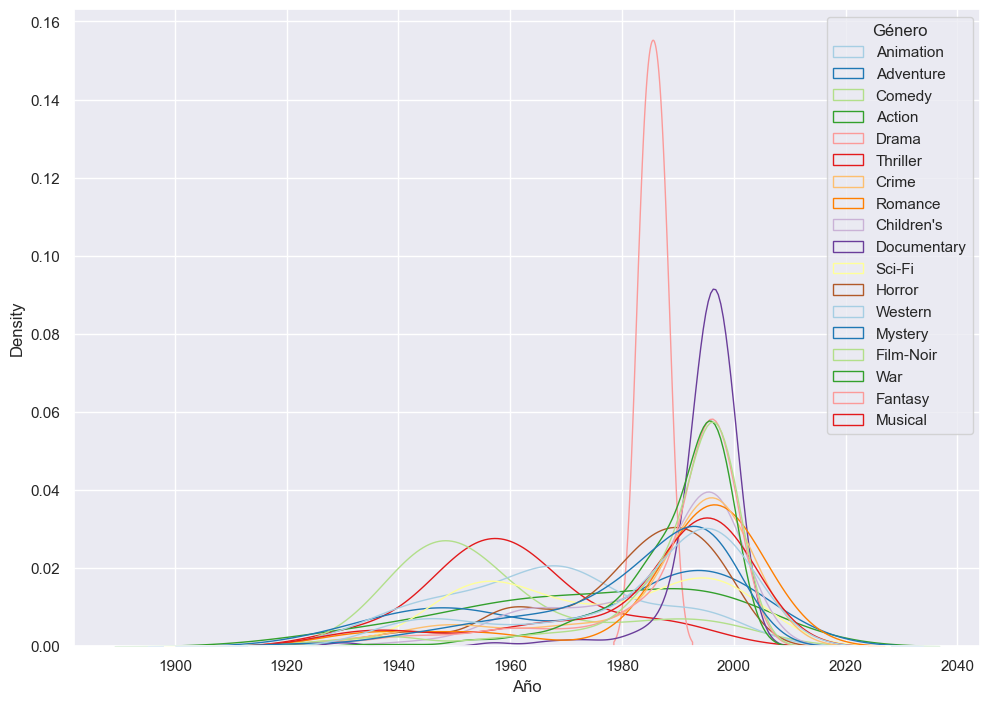

In [32]:

ax_1 = sns.kdeplot(x='Año', 
                 hue ='Género', 
                 #data=df_g, # Filtro de trabajo
                 data=df_pelis,
                 common_norm = False,
                 alpha = 0.0,
                 fill = True,
                 legend = 'reverse',
                 palette="Paired",
                )

sns.set(rc = {'figure.figsize' :(11.7,8.27)})

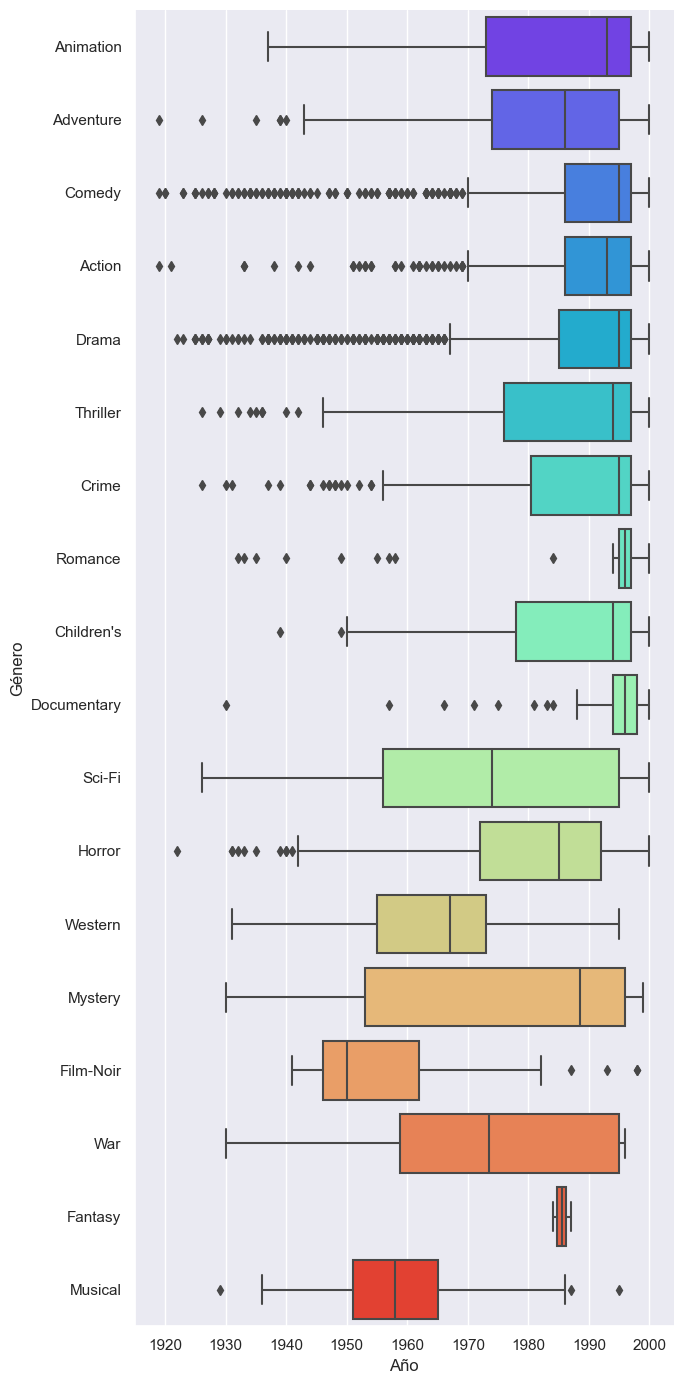

In [13]:
Orden = df_pelis.Género.value_counts().index
sns.catplot(x='Año', 
            y='Género',
            #row = "Género",
            #row_order = Orden,
            kind='box',
            data=df_pelis,
            #split=True,
            palette='rainbow',
            height=14, aspect=0.5,

            )
#plt.gcf().set_size_inches(8, 10)

In [14]:
#Filtros:
df_g=df_pelis
df_g=df_g.query('Género in ["Children\'s"]')
# Para ver como se comporta la fecha en la gráfica anterior Box
df_g.describe()

,Año
count,89.000000
mean,1985.910112
std,14.671897
min,1939.000000
25%,1978.000000
50%,1994.000000
75%,1997.000000
max,2000.000000


***Análisis de las Gráficas***   
Está gráfica de box, nos permite observar la distribución de datos categóricos. En nuestro ejemplo, podemos interpretar el comportamiento de nuestra variable Género en el tiempo.
No vamos a explicar todas.  
****Género:****  
- Musical: El mayor número de películas se produce entre los años 1951 y 1965, y el punto de más producción el año 1958 (Mediana). tenemos unos valores atípicos (intepretamos casi nula producción) y al final en el 1995 hacia hasta hoy no se han realizado o contabilizado en este dataSet ninguna producción más(esto es debido al corte que hemos realizado nosotros con el split).
- Fantasy: Tiene un auge enorme en un periodo de tiempo muy corto.

### Conclusiones:

Aunque podemos sacar buenos resultados/interpretaciones de la información que tenemos en la variable Género, está tiene muchos elementos, si reducimos más el agrupado seguramente nos permitira mejorar la interpretación.  Realizamos la prueba al final de este ejercicio.


Resultado Estadístico
                Año
count  3883.000000
mean   1986.066959
std      16.895690
min    1919.000000
25%    1982.000000
50%    1994.000000
75%    1997.000000
max    2000.000000
Resultado moda Año:
 0    1996
Name: Año, dtype: int32


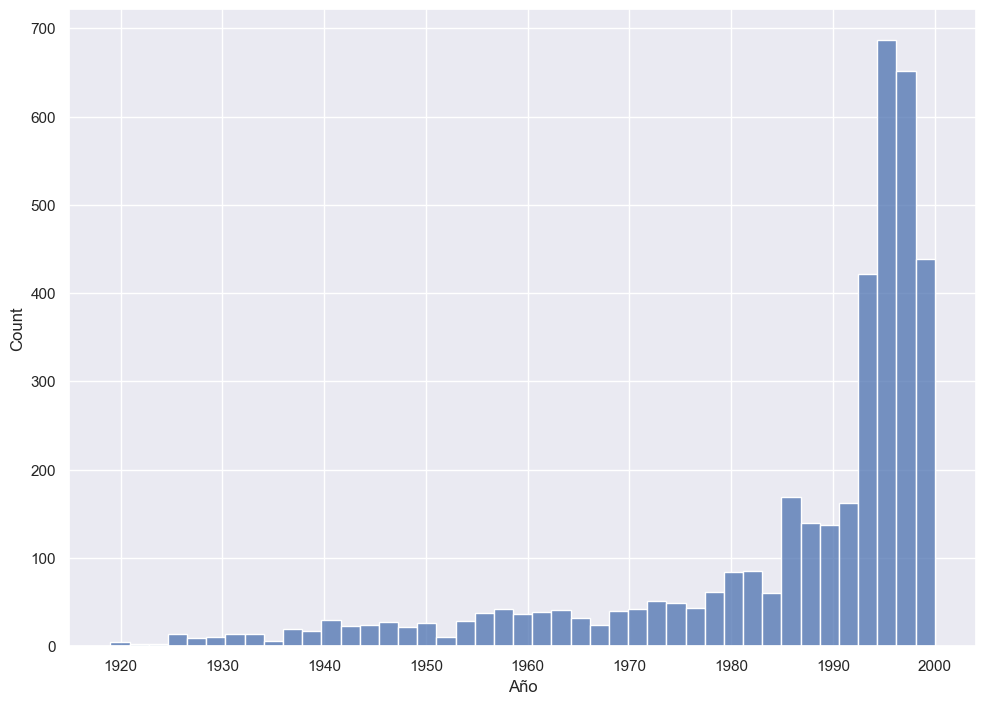

In [15]:
print("Resultado Estadístico\n", df_pelis.describe())
print("Resultado moda Año:\n",df_pelis.Año.mode())
ax_1 = sns.histplot(x='Año', 
                 #hue ='Género', 
                 data=df_pelis,
                 #common_norm = False,
                 #alpha = 0.0,
                 fill = True,
                 legend = 'reverse',
                 #palette="Paired",
                )

***Reducir el agrupado***  

Análizando la variable Género del fichero ***movies.dat***, observamos que para una misma película tenemos una o más catalogaciones.  Podriamos realizar un estudio del mismo, y realizar un agrupado nuevo conciderando el peso que le damos al contenido de la variable.

1    Animation|Children's|Comedy   
2    Adventure|Children's|Fantasy

Por ejemplo, podriamos decidir en nuestra regla que siempre que tengamos en una fila la palabra  "Fantasy", se catalogue esá película como "Fantasy"

Voy a reducir el agrupado, reestructurando la variable "Género" del DataSet df_pelis. Dejaré la variable original y crearé una nueva.

Estructura cogiendo: df_pelis['Género'].str.split("|").str[0]   
    - 'Animation'     
    - 'Adventure'      
    - 'Comedy'     
    - 'Action'     - 'Adventure',    
    - 'Drama'           
    - 'Thriller'       
    - 'Mystery'    - 'Thriller',     
    - 'Film-Noir'  - 'Thriller',        
    - 'Crime'      - 'Thriller',       
    - 'Romance'    
    - 'Children\'s'   - 'Animation',        
    - 'Documentary'    
    - 'Sci-Fi'     - 'Adventure',          
    - 'Horror'     
    - 'Western'    
    - 'War'        
    - 'Fantasy'    - 'Adventure',      
    - 'Musical'    


In [ ]:
df_g=data['Género'].head(2)
df_g

In [28]:
df_agr=df_pelis.copy(deep=True)
df_agr['GeneAgr']=df_agr['Género']
df_agr.head(2)

,Película,Año,Género,GeneAgr
Index,,,,
1,Toy Story,1995,Animation,Animation
2,Jumanji,1995,Adventure,Adventure


In [44]:
df_agr['GeneAgr'] = df_agr.GeneAgr.replace({'Action': 'Adventure', 
                                        'Mystery': 'Thriller', 
                                        'Film-Noir': 'Thriller',
                                        'Crime': 'Thriller',
                                        "Children\'s": 'Animation',
                                        'Sci-Fi':'Adventure',
                                        'Fantasy':'Adventure' 
                                       })

In [45]:
df_agr.GeneAgr.unique()

array(['Animation', 'Adventure', 'Comedy', 'Drama', 'Thriller', 'Romance',
       'Documentary', 'Horror', 'Western', 'War', 'Musical'], dtype=object)

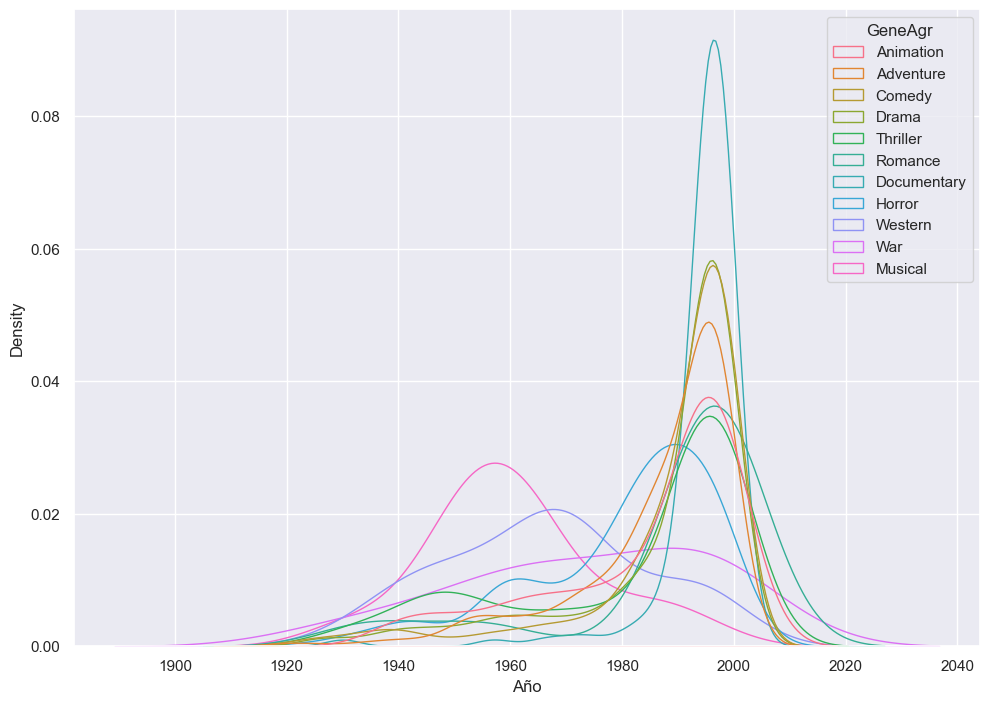

In [46]:
ax_1 = sns.kdeplot(x='Año', 
                 hue ='GeneAgr', # hue ='GeneAgr',
                 #data=df_g, # Filtro de trabajo
                 data=df_agr,
                 common_norm = False,
                 alpha = 0.0,
                 fill = True,
                 legend = 'reverse',
                 #palette="husl",
                )
sns.color_palette("Spectral", as_cmap=True)
sns.set(rc = {'figure.figsize' :(11.7,8.27)})

***Comentarios:***
    
Con está nueva agrupación (de prueba), no tenemos tantas variaciones y la interpretación mejora.